19666_2021-02-02_15.39_1537164.png
{'head': SVC(probability=True), 'spine': SVC(probability=True), 'leg': SVC(probability=True), 'arm': SVC(probability=True), 'foot': SVC(probability=True), 'hand': SVC(probability=True)}


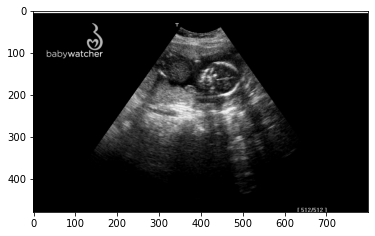

In [9]:
import os, random, cv2, Classify
import numpy as np
from matplotlib import pyplot as plt

oldpwd = os.getcwd()
os.chdir('..')
os.chdir('../resources')
pwd = os.getcwd()
os.chdir(oldpwd)

# 1. Load image(s)
img_name = random.choice(os.listdir(pwd + '/images/1'))
print(img_name)
img = cv2.imread(pwd + '/images/1/' + img_name, 0)
    
# 2. Load models
classifiers = Classify.load_svm(pwd + '/SVM')
print(classifiers)
plt.imshow(img, cmap='gray')

# 3. Analyse image

In [10]:
wanted_classifiers = ['head','spine']  # The keys you want
wanted_classifiers = dict((k, classifiers[k]) for k in wanted_classifiers if k in classifiers)
feat_image, result, pred = Classify.analyse_image(img, wanted_classifiers,  crop_thresh=0.2, blur_size=10, bright_strength=2, sharp_strength=1,
                               square_step=True, windows=[(64, 64), (96, 96), (128, 128), (192, 192)], window_stride=16, pred_threshold = 0.99)
print(len(pred), len(result))

1182 13


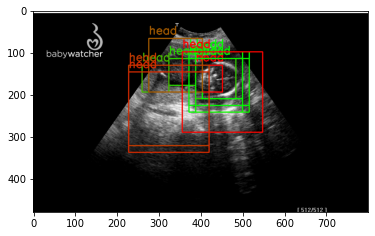

In [11]:
plt.imshow(feat_image)

In [12]:
result

,x,y,window_size,window,hog,head,spine,highest,highest_pred,best_none
96,113,324,"(64, 64)","[[13, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, ...","[[0.05303509007888818, 0.0, 0.0002073813819191...",0.998570,0.201292,head,0.998570,0.798708
114,129,260,"(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.997558,0.175183,head,0.997558,0.824817
122,129,388,"(64, 64)","[[16, 17, 19, 20, 20, 20, 20, 20, 19, 14, 14, ...","[[0.0016376484157046625, 0.0010995668425595702...",0.991167,0.231962,head,0.991167,0.768038
510,113,388,"(96, 96)","[[135, 144, 160, 163, 163, 160, 153, 124, 105,...","[[0.16064721131681098, 0.13176150061859287, 0....",0.998239,0.864799,head,0.998239,0.135201
511,113,404,"(96, 96)","[[23, 22, 19, 21, 19, 18, 18, 18, 19, 18, 16, ...","[[0.005768682737958039, 0.01059265740862521, 0...",0.999976,0.836471,head,0.999976,0.163529
781,65,276,"(128, 128)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.994299,0.271160,head,0.994299,0.728840
823,97,372,"(128, 128)","[[156, 163, 166, 172, 176, 182, 186, 189, 189,...","[[0.029431423002231123, 0.014489845980467018, ...",0.999973,0.914764,head,0.999973,0.085236
824,97,388,"(128, 128)","[[166, 156, 153, 141, 132, 121, 118, 116, 110,...","[[0.067995798989469, 0.07421769094135143, 0.06...",0.999987,0.766742,head,0.999987,0.233258
841,113,372,"(128, 128)","[[58, 66, 79, 100, 116, 118, 116, 118, 118, 11...","[[0.02068013874699812, 0.0036778155097570856, ...",0.999888,0.470071,head,0.999888,0.529929
842,113,388,"(128, 128)","[[135, 144, 160, 163, 163, 160, 153, 124, 105,...","[[0.14424413305578912, 0.09465886515271313, 0....",0.999484,0.517220,head,0.999484,0.482780
